In [1]:
import config
import torch
import sys
sys.path.append('../util')
sys.path.append('../others_networks')
sys.path.append('../umergenet')
import time
from Trainer import Trainer
from util import measure_inference_speed, count_trainable_parameters, clear_gpu
from DatasetReader import *

from UMergeNet import ConvType, UMergeNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
result_path = './umergenet/'

In [2]:
num_classes = config.num_classes
in_channels = config.in_channels

train_loader, test_loader, val_loader = get_datasets(dataset_dir=config.dataset_path, 
                                              resolution=config.dataset_resolution, 
                                              batch_size=config.batch_size)

torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])


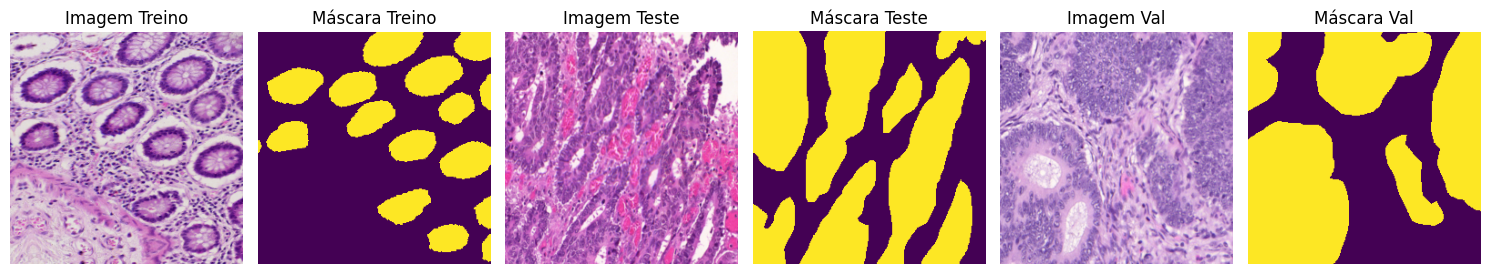

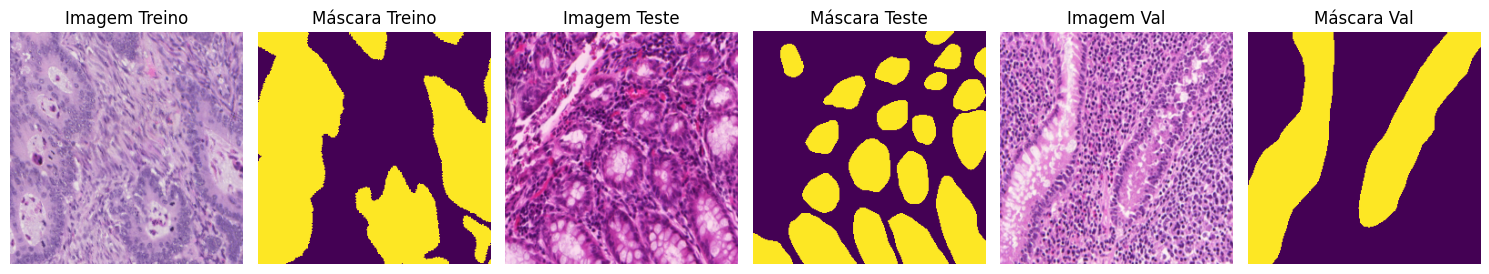

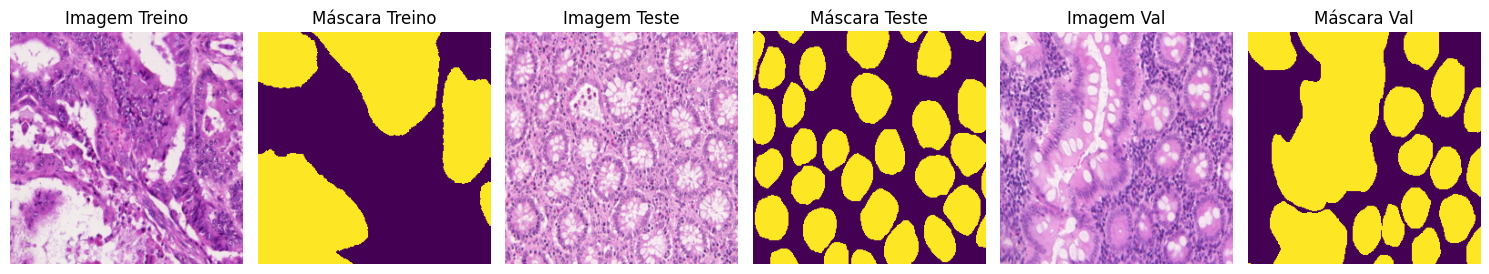

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [4]:
def train(model, model_name=None,learning_rate = 1e-3,epochs = 300, re_evaluate=False):

    model_filename = f'{model_name}-epochs{epochs}.pth'

    print(count_trainable_parameters(model,format=True))
    
    trainer = Trainer(model_filename=model_filename, 
                    model_dir=result_path, 
                    info={'config':''},
                    save_xlsx=True)
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            verbose=1, 
                            save_every=5, 
                            learning_rate=learning_rate,
                            continue_from_last=True)
    model.to(device)
    del model
    clear_gpu()
    if re_evaluate:
        trainer.evaluate_model(test_loader, print_stats=True)



# Axial

In [7]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
train(model, model_name='UMergeNet-axial-1')

1.726.801
trainable_parameters: 1726801
Parando na época 88 por early stopping. 0.0651 Dice: 0.9420 mIoU: 0.8965 F1: 0.9420 IoU: 0.8807 Precision: 0.9395 Recall: 0.9453 Q: 0.8449 Tempo total: 00:50:55 LR:0.000125

Melhor modelo:
 Epoch [68/300] - Loss: 0.0491 Val Loss: 0.0626 Dice: 0.9443 mIoU: 0.9000 F1: 0.9443 IoU: 0.8831 Precision: 0.9424 Recall: 0.9470 Q: 0.8501 Tempo total: 00:39:50 LR:0.000500
Ultimo modelo:
 Epoch [88/300] - Loss: 0.0408 Val Loss: 0.0651 Dice: 0.9420 mIoU: 0.8965 F1: 0.9420 IoU: 0.8807 Precision: 0.9395 Recall: 0.9453 Q: 0.8449 Tempo total: 00:50:55 LR:0.000125 FPS: 921.1526641130362
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-axial-1-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-axial-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-axial-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-axial-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample3-UMe

In [8]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
train(model, model_name='UMergeNet-axial-2')

1.726.801
trainable_parameters: 1726801
Parando na época 54 por early stopping. 0.0710 Dice: 0.9365 mIoU: 0.8877 F1: 0.9365 IoU: 0.8735 Precision: 0.9404 Recall: 0.9334 Q: 0.8317 Tempo total: 00:29:15 LR:0.000500

Melhor modelo:
 Epoch [34/300] - Loss: 0.0723 Val Loss: 0.0687 Dice: 0.9387 mIoU: 0.8912 F1: 0.9387 IoU: 0.8666 Precision: 0.9455 Recall: 0.9330 Q: 0.8370 Tempo total: 00:18:26 LR:0.001000
Ultimo modelo:
 Epoch [54/300] - Loss: 0.0546 Val Loss: 0.0710 Dice: 0.9365 mIoU: 0.8877 F1: 0.9365 IoU: 0.8735 Precision: 0.9404 Recall: 0.9334 Q: 0.8317 Tempo total: 00:29:15 LR:0.000500 FPS: 917.3108272394669
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-axial-2-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-axial-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-axial-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-axial-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample3-UMe

In [9]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
train(model, model_name='UMergeNet-axial-3')

1.726.801
trainable_parameters: 1726801
Parando na época 37 por early stopping. 0.0712 Dice: 0.9363 mIoU: 0.8877 F1: 0.9363 IoU: 0.8714 Precision: 0.9414 Recall: 0.9320 Q: 0.8317 Tempo total: 00:20:30 LR:0.000500

Melhor modelo:
 Epoch [17/300] - Loss: 0.0955 Val Loss: 0.0696 Dice: 0.9378 mIoU: 0.8895 F1: 0.9378 IoU: 0.8627 Precision: 0.9373 Recall: 0.9388 Q: 0.8344 Tempo total: 00:09:26 LR:0.001000
Ultimo modelo:
 Epoch [37/300] - Loss: 0.0625 Val Loss: 0.0712 Dice: 0.9363 mIoU: 0.8877 F1: 0.9363 IoU: 0.8714 Precision: 0.9414 Recall: 0.9320 Q: 0.8317 Tempo total: 00:20:30 LR:0.000500 FPS: 904.5492819218231
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-axial-3-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-axial-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-axial-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-axial-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample3-UMe

# Axial DW

In [10]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-axial-dw-1')

685.497
trainable_parameters: 685497
Parando na época 41 por early stopping. 0.0754 Dice: 0.9332 mIoU: 0.8826 F1: 0.9332 IoU: 0.8642 Precision: 0.9304 Recall: 0.9367 Q: 0.8241 Tempo total: 00:17:45 LR:0.000500

Melhor modelo:
 Epoch [21/300] - Loss: 0.0650 Val Loss: 0.0689 Dice: 0.9390 mIoU: 0.8916 F1: 0.9390 IoU: 0.8739 Precision: 0.9352 Recall: 0.9437 Q: 0.8376 Tempo total: 00:09:07 LR:0.001000
Ultimo modelo:
 Epoch [41/300] - Loss: 0.0380 Val Loss: 0.0754 Dice: 0.9332 mIoU: 0.8826 F1: 0.9332 IoU: 0.8642 Precision: 0.9304 Recall: 0.9367 Q: 0.8241 Tempo total: 00:17:45 LR:0.000500 FPS: 1067.8580117837128
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-axial-dw-1-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-axial-dw-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-axial-dw-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-axial-dw-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/s

In [11]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-axial-dw-2')

685.497
trainable_parameters: 685497
Parando na época 48 por early stopping. 0.0728 Dice: 0.9362 mIoU: 0.8871 F1: 0.9362 IoU: 0.8716 Precision: 0.9305 Recall: 0.9427 Q: 0.8309 Tempo total: 00:20:43 LR:0.000500

Melhor modelo:
 Epoch [28/300] - Loss: 0.0581 Val Loss: 0.0651 Dice: 0.9425 mIoU: 0.8972 F1: 0.9425 IoU: 0.8781 Precision: 0.9334 Recall: 0.9525 Q: 0.8459 Tempo total: 00:12:09 LR:0.001000
Ultimo modelo:
 Epoch [48/300] - Loss: 0.0361 Val Loss: 0.0728 Dice: 0.9362 mIoU: 0.8871 F1: 0.9362 IoU: 0.8716 Precision: 0.9305 Recall: 0.9427 Q: 0.8309 Tempo total: 00:20:43 LR:0.000500 FPS: 1100.8984342895558
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-axial-dw-2-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-axial-dw-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-axial-dw-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-axial-dw-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/s

In [12]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-axial-dw-3')

685.497
trainable_parameters: 685497
Parando na época 60 por early stopping. 0.0775 Dice: 0.9322 mIoU: 0.8813 F1: 0.9322 IoU: 0.8655 Precision: 0.9343 Recall: 0.9311 Q: 0.8221 Tempo total: 00:25:05 LR:0.000250

Melhor modelo:
 Epoch [40/300] - Loss: 0.0404 Val Loss: 0.0712 Dice: 0.9371 mIoU: 0.8889 F1: 0.9371 IoU: 0.8703 Precision: 0.9380 Recall: 0.9376 Q: 0.8335 Tempo total: 00:16:44 LR:0.000500
Ultimo modelo:
 Epoch [60/300] - Loss: 0.0290 Val Loss: 0.0775 Dice: 0.9322 mIoU: 0.8813 F1: 0.9322 IoU: 0.8655 Precision: 0.9343 Recall: 0.9311 Q: 0.8221 Tempo total: 00:25:05 LR:0.000250 FPS: 1099.393218377002
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-axial-dw-3-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-axial-dw-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-axial-dw-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-axial-dw-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sa

# Atrous

In [13]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous)
train(model, model_name='UMergeNet-atrous-1')

2.487.385
trainable_parameters: 2487385
Parando na época 46 por early stopping. 0.0745 Dice: 0.9345 mIoU: 0.8847 F1: 0.9345 IoU: 0.8677 Precision: 0.9408 Recall: 0.9293 Q: 0.8273 Tempo total: 00:24:37 LR:0.000500

Melhor modelo:
 Epoch [26/300] - Loss: 0.0799 Val Loss: 0.0714 Dice: 0.9374 mIoU: 0.8889 F1: 0.9374 IoU: 0.8641 Precision: 0.9356 Recall: 0.9399 Q: 0.8335 Tempo total: 00:13:56 LR:0.001000
Ultimo modelo:
 Epoch [46/300] - Loss: 0.0569 Val Loss: 0.0745 Dice: 0.9345 mIoU: 0.8847 F1: 0.9345 IoU: 0.8677 Precision: 0.9408 Recall: 0.9293 Q: 0.8273 Tempo total: 00:24:37 LR:0.000500 FPS: 968.6140357739424
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-atrous-1-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-atrous-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-atrous-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-atrous-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample3

In [14]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous)
train(model, model_name='UMergeNet-atrous-2')

2.487.385
trainable_parameters: 2487385
Parando na época 43 por early stopping. 0.0835 Dice: 0.9259 mIoU: 0.8713 F1: 0.9259 IoU: 0.8559 Precision: 0.9233 Recall: 0.9297 Q: 0.8072 Tempo total: 00:23:05 LR:0.000500

Melhor modelo:
 Epoch [23/300] - Loss: 0.0802 Val Loss: 0.0756 Dice: 0.9333 mIoU: 0.8825 F1: 0.9333 IoU: 0.8577 Precision: 0.9339 Recall: 0.9337 Q: 0.8239 Tempo total: 00:12:21 LR:0.001000
Ultimo modelo:
 Epoch [43/300] - Loss: 0.0575 Val Loss: 0.0835 Dice: 0.9259 mIoU: 0.8713 F1: 0.9259 IoU: 0.8559 Precision: 0.9233 Recall: 0.9297 Q: 0.8072 Tempo total: 00:23:05 LR:0.000500 FPS: 974.969178481219
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-atrous-2-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-atrous-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-atrous-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-atrous-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample3-

In [15]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous)
train(model, model_name='UMergeNet-atrous-3')

2.487.385
trainable_parameters: 2487385
Parando na época 46 por early stopping. 0.0797 Dice: 0.9298 mIoU: 0.8779 F1: 0.9298 IoU: 0.8601 Precision: 0.9488 Recall: 0.9130 Q: 0.8171 Tempo total: 00:24:38 LR:0.000500

Melhor modelo:
 Epoch [26/300] - Loss: 0.0796 Val Loss: 0.0731 Dice: 0.9352 mIoU: 0.8857 F1: 0.9352 IoU: 0.8621 Precision: 0.9361 Recall: 0.9356 Q: 0.8288 Tempo total: 00:13:57 LR:0.001000
Ultimo modelo:
 Epoch [46/300] - Loss: 0.0559 Val Loss: 0.0797 Dice: 0.9298 mIoU: 0.8779 F1: 0.9298 IoU: 0.8601 Precision: 0.9488 Recall: 0.9130 Q: 0.8171 Tempo total: 00:24:38 LR:0.000500 FPS: 966.85123738451
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-atrous-3-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-atrous-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-atrous-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-atrous-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample3-U

# Atrous DW

In [16]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-atrous-dw-1')

701.513
trainable_parameters: 701513
Parando na época 41 por early stopping. 0.0853 Dice: 0.9243 mIoU: 0.8702 F1: 0.9243 IoU: 0.8562 Precision: 0.9349 Recall: 0.9158 Q: 0.8055 Tempo total: 00:15:35 LR:0.000500

Melhor modelo:
 Epoch [21/300] - Loss: 0.0600 Val Loss: 0.0755 Dice: 0.9326 mIoU: 0.8816 F1: 0.9326 IoU: 0.8599 Precision: 0.9271 Recall: 0.9396 Q: 0.8226 Tempo total: 00:07:59 LR:0.001000
Ultimo modelo:
 Epoch [41/300] - Loss: 0.0376 Val Loss: 0.0853 Dice: 0.9243 mIoU: 0.8702 F1: 0.9243 IoU: 0.8562 Precision: 0.9349 Recall: 0.9158 Q: 0.8055 Tempo total: 00:15:35 LR:0.000500 FPS: 1337.0254535224872
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-atrous-dw-1-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-atrous-dw-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-atrous-dw-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-atrous-dw-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outpu

In [17]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-atrous-dw-2')

701.513
trainable_parameters: 701513
Parando na época 59 por early stopping. 0.0822 Dice: 0.9283 mIoU: 0.8759 F1: 0.9283 IoU: 0.8585 Precision: 0.9376 Recall: 0.9209 Q: 0.8141 Tempo total: 00:22:21 LR:0.000250

Melhor modelo:
 Epoch [39/300] - Loss: 0.0400 Val Loss: 0.0777 Dice: 0.9314 mIoU: 0.8804 F1: 0.9314 IoU: 0.8622 Precision: 0.9318 Recall: 0.9323 Q: 0.8208 Tempo total: 00:14:47 LR:0.000500
Ultimo modelo:
 Epoch [59/300] - Loss: 0.0295 Val Loss: 0.0822 Dice: 0.9283 mIoU: 0.8759 F1: 0.9283 IoU: 0.8585 Precision: 0.9376 Recall: 0.9209 Q: 0.8141 Tempo total: 00:22:21 LR:0.000250 FPS: 1347.0614554250803
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-atrous-dw-2-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-atrous-dw-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-atrous-dw-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-atrous-dw-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outpu

In [18]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Atrous, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-atrous-dw-3')

701.513
trainable_parameters: 701513
Parando na época 55 por early stopping. 0.0778 Dice: 0.9314 mIoU: 0.8805 F1: 0.9314 IoU: 0.8577 Precision: 0.9344 Recall: 0.9299 Q: 0.8209 Tempo total: 00:20:51 LR:0.000500

Melhor modelo:
 Epoch [35/300] - Loss: 0.0474 Val Loss: 0.0762 Dice: 0.9321 mIoU: 0.8814 F1: 0.9321 IoU: 0.8645 Precision: 0.9302 Recall: 0.9354 Q: 0.8223 Tempo total: 00:13:17 LR:0.001000
Ultimo modelo:
 Epoch [55/300] - Loss: 0.0336 Val Loss: 0.0778 Dice: 0.9314 mIoU: 0.8805 F1: 0.9314 IoU: 0.8577 Precision: 0.9344 Recall: 0.9299 Q: 0.8209 Tempo total: 00:20:51 LR:0.000500 FPS: 1340.8782371638356
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-atrous-dw-3-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-atrous-dw-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-atrous-dw-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-atrous-dw-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outpu

# Normal

In [19]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Normal)
train(model, model_name='UMergeNet-normal-1')

4.150.297
trainable_parameters: 4150297
Parando na época 69 por early stopping. 0.0800 Dice: 0.9290 mIoU: 0.8773 F1: 0.9290 IoU: 0.8609 Precision: 0.9416 Recall: 0.9185 Q: 0.8161 Tempo total: 00:44:29 LR:0.000250

Melhor modelo:
 Epoch [49/300] - Loss: 0.0614 Val Loss: 0.0763 Dice: 0.9320 mIoU: 0.8812 F1: 0.9320 IoU: 0.8597 Precision: 0.9419 Recall: 0.9234 Q: 0.8220 Tempo total: 00:31:37 LR:0.000500
Ultimo modelo:
 Epoch [69/300] - Loss: 0.0497 Val Loss: 0.0800 Dice: 0.9290 mIoU: 0.8773 F1: 0.9290 IoU: 0.8609 Precision: 0.9416 Recall: 0.9185 Q: 0.8161 Tempo total: 00:44:29 LR:0.000250 FPS: 778.4313675453002
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-normal-1-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-normal-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-normal-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-normal-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample3

In [20]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Normal)
train(model, model_name='UMergeNet-normal-2')

4.150.297
trainable_parameters: 4150297
Parando na época 50 por early stopping. 0.0729 Dice: 0.9350 mIoU: 0.8855 F1: 0.9350 IoU: 0.8645 Precision: 0.9427 Recall: 0.9284 Q: 0.8284 Tempo total: 00:32:13 LR:0.000250

Melhor modelo:
 Epoch [30/300] - Loss: 0.0724 Val Loss: 0.0679 Dice: 0.9392 mIoU: 0.8923 F1: 0.9392 IoU: 0.8624 Precision: 0.9418 Recall: 0.9377 Q: 0.8386 Tempo total: 00:19:21 LR:0.000500
Ultimo modelo:
 Epoch [50/300] - Loss: 0.0572 Val Loss: 0.0729 Dice: 0.9350 mIoU: 0.8855 F1: 0.9350 IoU: 0.8645 Precision: 0.9427 Recall: 0.9284 Q: 0.8284 Tempo total: 00:32:13 LR:0.000250 FPS: 778.1734819359466
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-normal-2-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-normal-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-normal-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-normal-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample3

In [21]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Normal)
train(model, model_name='UMergeNet-normal-3')

4.150.297
trainable_parameters: 4150297
Parando na época 65 por early stopping. 0.0680 Dice: 0.9392 mIoU: 0.8919 F1: 0.9392 IoU: 0.8670 Precision: 0.9350 Recall: 0.9440 Q: 0.8379 Tempo total: 00:41:51 LR:0.000250

Melhor modelo:
 Epoch [45/300] - Loss: 0.0614 Val Loss: 0.0667 Dice: 0.9404 mIoU: 0.8940 F1: 0.9404 IoU: 0.8653 Precision: 0.9405 Recall: 0.9408 Q: 0.8411 Tempo total: 00:29:00 LR:0.000500
Ultimo modelo:
 Epoch [65/300] - Loss: 0.0504 Val Loss: 0.0680 Dice: 0.9392 mIoU: 0.8919 F1: 0.9392 IoU: 0.8670 Precision: 0.9350 Recall: 0.9440 Q: 0.8379 Tempo total: 00:41:51 LR:0.000250 FPS: 779.6494457378152
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-normal-3-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-normal-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-normal-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-normal-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample3

# Normal DW

In [22]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Normal, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-normal-dw-1')

739.913
trainable_parameters: 739913
Parando na época 35 por early stopping. 0.0841 Dice: 0.9264 mIoU: 0.8725 F1: 0.9264 IoU: 0.8617 Precision: 0.9198 Recall: 0.9347 Q: 0.8090 Tempo total: 00:14:51 LR:0.000500

Melhor modelo:
 Epoch [15/300] - Loss: 0.0757 Val Loss: 0.0772 Dice: 0.9311 mIoU: 0.8797 F1: 0.9311 IoU: 0.8536 Precision: 0.9443 Recall: 0.9202 Q: 0.8198 Tempo total: 00:06:22 LR:0.001000
Ultimo modelo:
 Epoch [35/300] - Loss: 0.0428 Val Loss: 0.0841 Dice: 0.9264 mIoU: 0.8725 F1: 0.9264 IoU: 0.8617 Precision: 0.9198 Recall: 0.9347 Q: 0.8090 Tempo total: 00:14:51 LR:0.000500 FPS: 1203.9805407903527
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-normal-dw-1-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-normal-dw-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-normal-dw-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-normal-dw-1-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outpu

In [23]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Normal, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-normal-dw-2')

739.913
trainable_parameters: 739913
Parando na época 37 por early stopping. 0.0767 Dice: 0.9323 mIoU: 0.8815 F1: 0.9323 IoU: 0.8663 Precision: 0.9291 Recall: 0.9358 Q: 0.8224 Tempo total: 00:15:41 LR:0.000500

Melhor modelo:
 Epoch [17/300] - Loss: 0.0761 Val Loss: 0.0714 Dice: 0.9363 mIoU: 0.8876 F1: 0.9363 IoU: 0.8632 Precision: 0.9363 Recall: 0.9370 Q: 0.8316 Tempo total: 00:07:13 LR:0.001000
Ultimo modelo:
 Epoch [37/300] - Loss: 0.0437 Val Loss: 0.0767 Dice: 0.9323 mIoU: 0.8815 F1: 0.9323 IoU: 0.8663 Precision: 0.9291 Recall: 0.9358 Q: 0.8224 Tempo total: 00:15:41 LR:0.000500 FPS: 1207.9344511221057
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-normal-dw-2-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-normal-dw-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-normal-dw-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-normal-dw-2-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outpu

In [24]:
model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Normal, encoder_groups='dw', decoder_groups='dw', merger_groups='dw')
train(model, model_name='UMergeNet-normal-dw-3')

739.913
trainable_parameters: 739913
Parando na época 41 por early stopping. 0.0753 Dice: 0.9332 mIoU: 0.8828 F1: 0.9332 IoU: 0.8643 Precision: 0.9364 Recall: 0.9310 Q: 0.8244 Tempo total: 00:17:20 LR:0.000500

Melhor modelo:
 Epoch [21/300] - Loss: 0.0696 Val Loss: 0.0695 Dice: 0.9379 mIoU: 0.8898 F1: 0.9379 IoU: 0.8641 Precision: 0.9393 Recall: 0.9378 Q: 0.8348 Tempo total: 00:08:53 LR:0.001000
Ultimo modelo:
 Epoch [41/300] - Loss: 0.0391 Val Loss: 0.0753 Dice: 0.9332 mIoU: 0.8828 F1: 0.9332 IoU: 0.8643 Precision: 0.9364 Recall: 0.9310 Q: 0.8244 Tempo total: 00:17:20 LR:0.000500 FPS: 1208.4641099351802
Saved as ./umergenet-visapp-2026-bcedice/UMergeNet-normal-dw-3-epochs300.pth
./umergenet-visapp-2026-bcedice/outputs/sample0-UMergeNet-normal-dw-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample1-UMergeNet-normal-dw-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outputs/sample2-UMergeNet-normal-dw-3-epochs300.png saved.
./umergenet-visapp-2026-bcedice/outpu

In [25]:
import os
os.system('play -nq -t alsa synth 0.2 sine 600; play -nq -t alsa synth 0.2 sine 600')
os.system('play -nq -t alsa synth 0.2 sine 600; play -nq -t alsa synth 0.2 sine 600')
os.system('play -nq -t alsa synth 0.2 sine 600; play -nq -t alsa synth 0.2 sine 600')

0

/mnt/TUDAO/DocNanoNet/ImageComparisonGenerator.py:340: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,1,0.96])


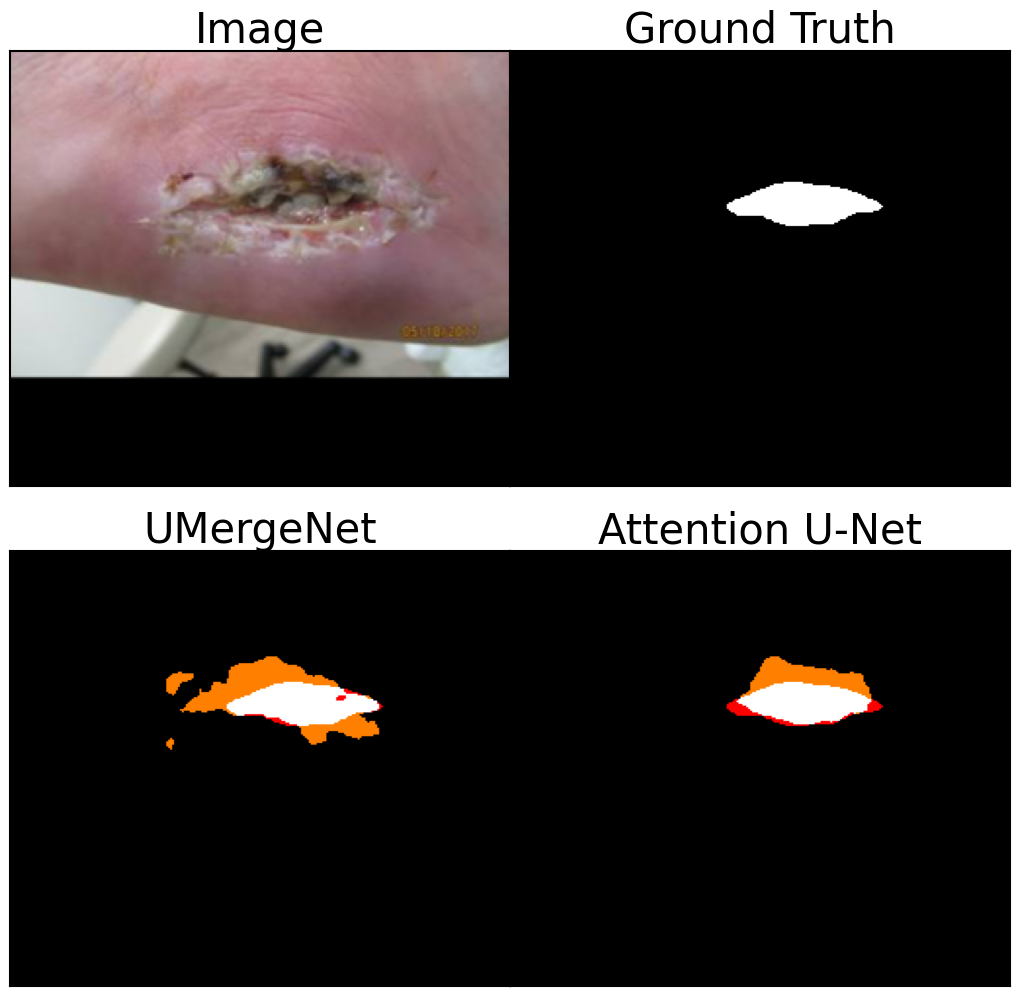

In [ ]:
from ImageComparisonGenerator import ImageComparisonGenerator, load_model

model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
model1 = load_model(model,"./umergenet-visapp-2026-bcedice/UMergeNet-axial-1-epochs300-best.pth")


import sys
sys.path.append("/mnt/TUDAO/Image_Segmentation")
from network import AttU_Net

model = AttU_Net(img_ch=in_channels, output_ch=num_classes)
model2 = load_model(model,"./LeeJunUNets/UNet-3-best.pth")

icg = ImageComparisonGenerator(model=model1, model_name1="UMergeNet", model2=model2, model_name2="U-Net")
icg.save_output_quad(val_loader, samples=[6], do_diff=True, invert_diff_colors=True, do_save='fuseg-quad-6.eps')

#predict_and_show_mask(model, val_loader,0)

/mnt/TUDAO/DocNanoNet/ImageComparisonGenerator.py:271: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,1,0.96])


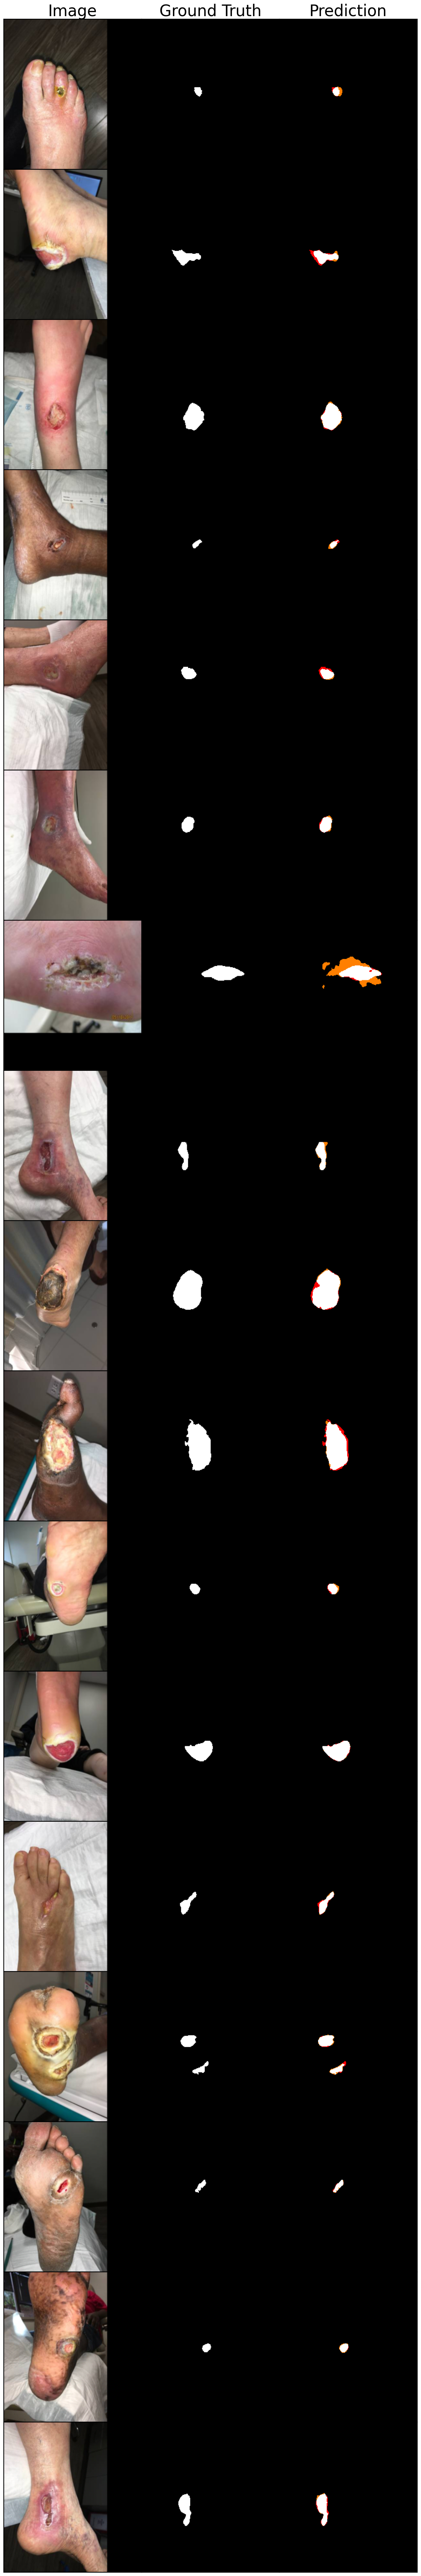

In [5]:

from ImageComparisonGenerator import ImageComparisonGenerator, load_model


model = UMergeNet(in_channels=in_channels, out_channels=num_classes, conv_type=ConvType.Axial)
model1 = load_model(model,"./umergenet-visapp-2026-bcedice/UMergeNet-axial-1-epochs300-best.pth")

icg = ImageComparisonGenerator(model)
icg.save_output_row(val_loader, samples=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], do_diff=True, invert_diff_colors=True, do_save='fuseg.eps')

#predict_and_show_mask(model, val_loader,0)